# DoS Attack Dataset

## Import Libraries

In [2]:
# libraries for data analyze
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from keras.wrappers.scikit_learn import KerasClassifier 
from keras.utils import np_utils

In [3]:
# libraries for modeling 
from keras.models import Sequential 
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping 

## Read Data

In [4]:
df = pd.read_csv("DoS_dataset.csv", header=None)

In [5]:
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.478198e+09,0316,8,05,21,68,09,21,21,00,6f,R
1,1.478198e+09,018f,8,fe,5b,00,00,00,3c,00,00,R
2,1.478198e+09,0260,8,19,21,22,30,08,8e,6d,3a,R
3,1.478198e+09,02a0,8,64,00,9a,1d,97,02,bd,00,R
4,1.478198e+09,0329,8,40,bb,7f,14,11,20,00,14,R
...,...,...,...,...,...,...,...,...,...,...,...,...
3665766,1.478201e+09,018f,8,fe,59,00,00,00,41,00,00,R
3665767,1.478201e+09,0260,8,18,21,21,30,08,8f,6d,19,R
3665768,1.478201e+09,02a0,8,24,00,9a,1d,97,02,bd,00,R
3665769,1.478201e+09,0329,8,dc,b7,7f,14,11,20,00,14,R


<AxesSubplot:>

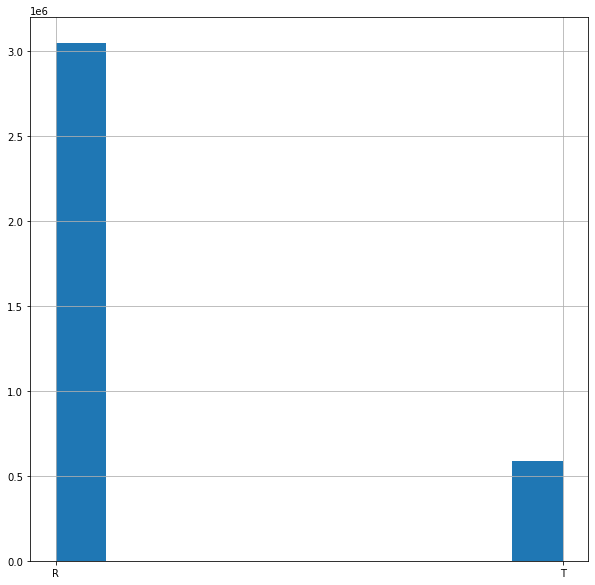

In [6]:
df[11].hist(figsize=(10, 10))

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665771 entries, 0 to 3665770
Data columns (total 12 columns):
 #   Column  Dtype  
---  ------  -----  
 0   0       float64
 1   1       object 
 2   2       int64  
 3   3       object 
 4   4       object 
 5   5       object 
 6   6       object 
 7   7       object 
 8   8       object 
 9   9       object 
 10  10      object 
 11  11      object 
dtypes: float64(1), int64(1), object(10)
memory usage: 335.6+ MB


In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.478198e+09,0316,8,05,21,68,09,21,21,00,6f,R
1,1.478198e+09,018f,8,fe,5b,00,00,00,3c,00,00,R
2,1.478198e+09,0260,8,19,21,22,30,08,8e,6d,3a,R
3,1.478198e+09,02a0,8,64,00,9a,1d,97,02,bd,00,R
4,1.478198e+09,0329,8,40,bb,7f,14,11,20,00,14,R


In [9]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11
3665766,1.478201e+09,018f,8,fe,59,00,00,00,41,00,00,R
3665767,1.478201e+09,0260,8,18,21,21,30,08,8f,6d,19,R
3665768,1.478201e+09,02a0,8,24,00,9a,1d,97,02,bd,00,R
3665769,1.478201e+09,0329,8,dc,b7,7f,14,11,20,00,14,R
3665770,1.478201e+09,0545,8,d8,00,00,8b,00,00,00,00,R


In [10]:
df[0].describe()

count    3.665771e+06
mean     1.478200e+09
std      8.471851e+02
min      1.478198e+09
25%      1.478199e+09
50%      1.478200e+09
75%      1.478201e+09
max      1.478201e+09
Name: 0, dtype: float64

<AxesSubplot:>

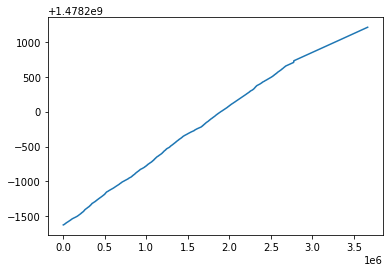

In [11]:
df[0].plot(kind='line')

In [5]:
# drop timestamp 
df.drop([0], axis=1, inplace=True)

In [14]:
df

,1,2,3,4,5,6,7,8,9,10,11
0,0316,8,05,21,68,09,21,21,00,6f,R
1,018f,8,fe,5b,00,00,00,3c,00,00,R
2,0260,8,19,21,22,30,08,8e,6d,3a,R
3,02a0,8,64,00,9a,1d,97,02,bd,00,R
4,0329,8,40,bb,7f,14,11,20,00,14,R
...,...,...,...,...,...,...,...,...,...,...,...
3665766,018f,8,fe,59,00,00,00,41,00,00,R
3665767,0260,8,18,21,21,30,08,8f,6d,19,R
3665768,02a0,8,24,00,9a,1d,97,02,bd,00,R
3665769,0329,8,dc,b7,7f,14,11,20,00,14,R


In [6]:
# remove nan 
df.dropna()

,1,2,3,4,5,6,7,8,9,10,11
0,0316,8,05,21,68,09,21,21,00,6f,R
1,018f,8,fe,5b,00,00,00,3c,00,00,R
2,0260,8,19,21,22,30,08,8e,6d,3a,R
3,02a0,8,64,00,9a,1d,97,02,bd,00,R
4,0329,8,40,bb,7f,14,11,20,00,14,R
...,...,...,...,...,...,...,...,...,...,...,...
3665766,018f,8,fe,59,00,00,00,41,00,00,R
3665767,0260,8,18,21,21,30,08,8f,6d,19,R
3665768,02a0,8,24,00,9a,1d,97,02,bd,00,R
3665769,0329,8,dc,b7,7f,14,11,20,00,14,R


In [26]:
df

,1,2,3,4,5,6,7,8,9,10,11
0,0316,8,05,21,68,09,21,21,00,6f,R
1,018f,8,fe,5b,00,00,00,3c,00,00,R
2,0260,8,19,21,22,30,08,8e,6d,3a,R
3,02a0,8,64,00,9a,1d,97,02,bd,00,R
4,0329,8,40,bb,7f,14,11,20,00,14,R
...,...,...,...,...,...,...,...,...,...,...,...
3665766,018f,8,fe,59,00,00,00,41,00,00,R
3665767,0260,8,18,21,21,30,08,8f,6d,19,R
3665768,02a0,8,24,00,9a,1d,97,02,bd,00,R
3665769,0329,8,dc,b7,7f,14,11,20,00,14,R


In [7]:
df.isnull().sum()

1         0
2         0
3         0
4         0
5         0
6     31188
7     31188
8     31188
9     31188
10    31188
11    31188
dtype: int64

In [8]:
df = df.dropna()
df = df.dropna(axis=0)

In [9]:
df.isnull().sum()

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
dtype: int64

In [10]:
df.isna()

,1,2,3,4,5,6,7,8,9,10,11
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
3665766,False,False,False,False,False,False,False,False,False,False,False
3665767,False,False,False,False,False,False,False,False,False,False,False
3665768,False,False,False,False,False,False,False,False,False,False,False
3665769,False,False,False,False,False,False,False,False,False,False,False


In [32]:
df

,1,2,3,4,5,6,7,8,9,10,11
0,0316,8,05,21,68,09,21,21,00,6f,R
1,018f,8,fe,5b,00,00,00,3c,00,00,R
2,0260,8,19,21,22,30,08,8e,6d,3a,R
3,02a0,8,64,00,9a,1d,97,02,bd,00,R
4,0329,8,40,bb,7f,14,11,20,00,14,R
...,...,...,...,...,...,...,...,...,...,...,...
3665766,018f,8,fe,59,00,00,00,41,00,00,R
3665767,0260,8,18,21,21,30,08,8f,6d,19,R
3665768,02a0,8,24,00,9a,1d,97,02,bd,00,R
3665769,0329,8,dc,b7,7f,14,11,20,00,14,R


In [11]:
df[11].unique()

array(['R', 'T'], dtype=object)

In [45]:
df

,1,2,3,4,5,6,7,8,9,10,11
0,0316,8,05,21,68,09,21,21,00,6f,R
1,018f,8,fe,5b,00,00,00,3c,00,00,R
2,0260,8,19,21,22,30,08,8e,6d,3a,R
3,02a0,8,64,00,9a,1d,97,02,bd,00,R
4,0329,8,40,bb,7f,14,11,20,00,14,R
...,...,...,...,...,...,...,...,...,...,...,...
3665766,018f,8,fe,59,00,00,00,41,00,00,R
3665767,0260,8,18,21,21,30,08,8f,6d,19,R
3665768,02a0,8,24,00,9a,1d,97,02,bd,00,R
3665769,0329,8,dc,b7,7f,14,11,20,00,14,R


In [12]:
df.drop([2], axis=1, inplace=True)

In [13]:
df

,1,3,4,5,6,7,8,9,10,11
0,0316,05,21,68,09,21,21,00,6f,R
1,018f,fe,5b,00,00,00,3c,00,00,R
2,0260,19,21,22,30,08,8e,6d,3a,R
3,02a0,64,00,9a,1d,97,02,bd,00,R
4,0329,40,bb,7f,14,11,20,00,14,R
...,...,...,...,...,...,...,...,...,...,...
3665766,018f,fe,59,00,00,00,41,00,00,R
3665767,0260,18,21,21,30,08,8f,6d,19,R
3665768,02a0,24,00,9a,1d,97,02,bd,00,R
3665769,0329,dc,b7,7f,14,11,20,00,14,R


In [14]:
df.drop([1], axis=1, inplace=True)

In [15]:
df

,3,4,5,6,7,8,9,10,11
0,05,21,68,09,21,21,00,6f,R
1,fe,5b,00,00,00,3c,00,00,R
2,19,21,22,30,08,8e,6d,3a,R
3,64,00,9a,1d,97,02,bd,00,R
4,40,bb,7f,14,11,20,00,14,R
...,...,...,...,...,...,...,...,...,...
3665766,fe,59,00,00,00,41,00,00,R
3665767,18,21,21,30,08,8f,6d,19,R
3665768,24,00,9a,1d,97,02,bd,00,R
3665769,dc,b7,7f,14,11,20,00,14,R


In [16]:
label = df[11]

In [17]:
label

0          R
1          R
2          R
3          R
4          R
          ..
3665766    R
3665767    R
3665768    R
3665769    R
3665770    R
Name: 11, Length: 3634583, dtype: object

In [18]:
data = df.loc[:,3:10]

In [19]:
data

,3,4,5,6,7,8,9,10
0,05,21,68,09,21,21,00,6f
1,fe,5b,00,00,00,3c,00,00
2,19,21,22,30,08,8e,6d,3a
3,64,00,9a,1d,97,02,bd,00
4,40,bb,7f,14,11,20,00,14
...,...,...,...,...,...,...,...,...
3665766,fe,59,00,00,00,41,00,00
3665767,18,21,21,30,08,8f,6d,19
3665768,24,00,9a,1d,97,02,bd,00
3665769,dc,b7,7f,14,11,20,00,14


# train, test split 20%

In [20]:
# import libraries for train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42)

In [21]:
X_test, y_test

(         3   4   5   6   7   8   9   10
 3242470  00  21  10  ff  00  ff  00  00
 112991   d8  5d  00  8b  00  00  00  00
 1931336  05  21  3c  0a  21  1f  00  6f
 2506780  19  22  22  30  08  8e  6c  18
 1694121  00  00  00  00  00  00  00  00
 ...      ..  ..  ..  ..  ..  ..  ..  ..
 428428   86  be  7f  14  11  20  00  14
 1920551  f7  7f  00  00  3e  7f  01  30
 2391203  00  00  00  00  00  08  04  24
 2539152  f2  7f  00  00  36  7f  06  5b
 3539138  0e  80  00  00  30  7f  0a  d9
 
 [726917 rows x 8 columns],
 3242470    R
 112991     R
 1931336    R
 2506780    R
 1694121    T
           ..
 428428     R
 1920551    R
 2391203    R
 2539152    R
 3539138    R
 Name: 11, Length: 726917, dtype: object)

In [22]:
X_train, y_train

(         3   4   5   6   7   8   9   10
 3281514  00  00  00  80  00  69  d1  13
 2897398  24  00  9b  1d  97  02  bd  00
 2942187  00  20  00  00  00  00  00  00
 2290793  1b  80  00  ff  1c  80  0f  e0
 1911552  d8  00  00  8a  00  00  00  00
 ...      ..  ..  ..  ..  ..  ..  ..  ..
 2374492  00  00  00  00  00  00  00  00
 3541414  0f  80  00  ff  3a  80  05  d7
 2246320  00  21  10  ff  00  ff  00  00
 2790041  00  00  00  80  00  69  d1  13
 2236254  0b  80  00  ff  f9  7f  04  ce
 
 [2907666 rows x 8 columns],
 3281514    R
 2897398    R
 2942187    R
 2290793    R
 1911552    R
           ..
 2374492    T
 3541414    R
 2246320    R
 2790041    R
 2236254    R
 Name: 11, Length: 2907666, dtype: object)

In [1]:
type(X_train)

NameError: name 'X_train' is not defined